## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data collections and preprocessing

In [ ]:
# loading data
gold_data = pd.read_csv('/content/sample_data/gld_price_data.csv')

In [ ]:
# print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# statistical data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
# remove 'date' columns
gold_data = gold_data.drop(columns = 'Date',axis=1)

In [ ]:
gold_data

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


Find the co-relation
1. positive
2. Negative

In [ ]:
correlation = gold_data.corr()

In [ ]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

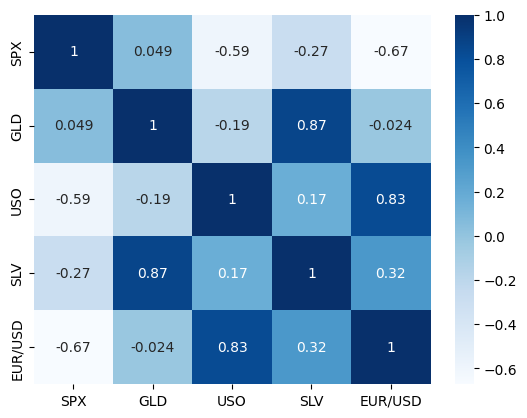

In [ ]:
sns.heatmap(correlation , annot=True, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-19-2e35bbe272a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

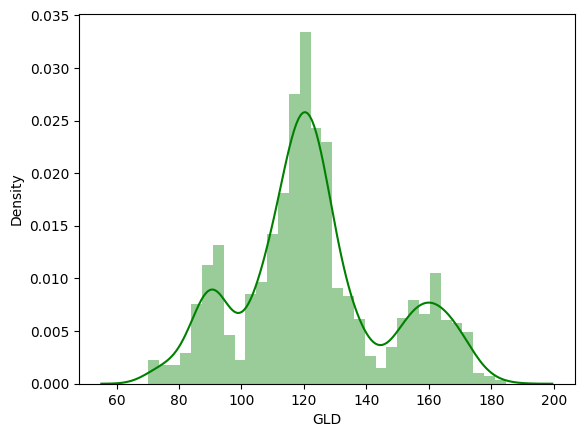

In [ ]:
# checking the distribution of GLD Price
sns.distplot(gold_data['GLD'], color='green')

## Splitting the feature and traget

In [ ]:
X = gold_data.drop(['GLD'], axis = 1)
y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into training data and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

Model Training : Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
# training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.52249925  81.88879985 115.82549971 127.62340068 120.61240125
 154.5377974  150.67239935 126.24440018 117.35939865 126.07130042
 116.57690094 171.95440107 141.49399815 167.74099892 115.14800014
 117.71420057 139.48300311 170.01490115 159.5992031  158.4467998
 155.11600044 125.02460002 176.5138987  157.12460359 125.22100046
  93.6885994   78.03360026 120.28310009 119.06589933 167.46780068
  88.08920043 125.32270014  90.95650029 117.53060045 121.13519905
 135.67620045 115.49990131 114.84120096 145.15509994 107.34510102
 104.23940218  87.11329804 126.43100055 118.06749991 155.57689895
 119.53180028 108.55449982 108.02179825  93.13550048 127.02639805
  74.90350047 113.74069946 121.50990031 111.0691992  118.84719889
 121.16249909 160.10950051 166.67710202 146.64699689  85.65599872
  94.14820029  86.70119905  90.52540015 119.07150042 126.47730043
 127.44220009 167.79409921 122.1479995  117.37919896  98.78890009
 168.26380132 143.02729817 131.82810246 121.22100223 121.39329927
 119.834200

In [ ]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared error', error_score)

R squared error 0.9902690186384353


Compare the actual values and predicted values in a plot

In [ ]:
y_test = list(y_test)

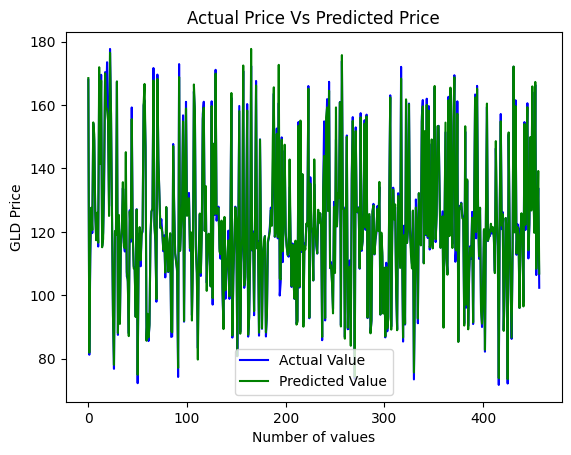

In [ ]:
plt.plot(y_test, color = 'blue', label='Actual Value')
plt.plot(test_data_prediction, color = 'green', label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<ipython-input-45-a3edb847bfde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data)


<Axes: ylabel='Density'>

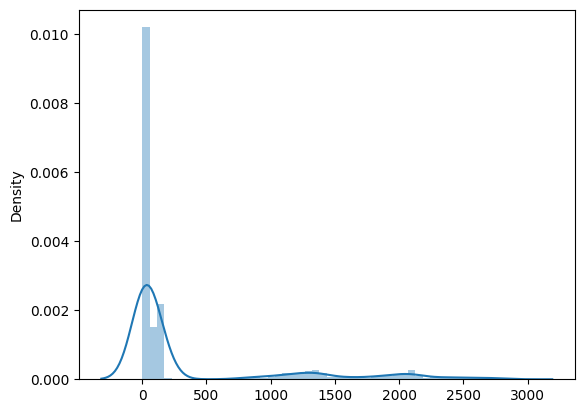

In [ ]:
sns.distplot(gold_data)

In [ ]:
from sklearn.
scaler  = StandardScaler()